In [1]:
# Importing relevant Python librarires
import pandas as pd
import numpy as np
import matplotlib as bplt

In [67]:
# Reading the data file
listings = pd.read_csv('listings.csv')

In [68]:
# Data Cleaning by Removing duplicated rows and non relevant columns
listings_clean = listings.drop_duplicates().drop(columns = ['listing_url','scrape_id','last_scraped','source','description',
                                          'neighborhood_overview','picture_url','host_url','host_since','host_location',
                                          'host_about','host_response_time','host_response_rate','host_acceptance_rate',
                                          'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood',
                                          'host_listings_count','host_total_listings_count','host_verifications',
                                          'host_has_profile_pic','neighbourhood_group_cleansed',
                                          'latitude','longitude', 'bathrooms','bathrooms_text','bedrooms', 'beds', 
                                          'minimum_nights','maximum_nights', 'minimum_minimum_nights', 
                                          'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights', 
                                          'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 
                                          'has_availability', 'availability_30','availability_60','availability_90',
                                          'calendar_last_scraped', 'number_of_reviews','number_of_reviews_ltm',
                                          'number_of_reviews_l30d', 'first_review','last_review','review_scores_rating',
                                          'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                                          'review_scores_communication', 'review_scores_location','review_scores_value',
                                          'license','instant_bookable', 'calculated_host_listings_count',
                                          'calculated_host_listings_count_entire_homes', 
                                          'calculated_host_listings_count_private_rooms', 
                                          'calculated_host_listings_count_shared_rooms','reviews_per_month'])

In [69]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6635
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      6636 non-null   int64 
 1   name                    6636 non-null   object
 2   host_id                 6636 non-null   int64 
 3   host_name               6636 non-null   object
 4   host_identity_verified  6636 non-null   object
 5   neighbourhood           4859 non-null   object
 6   neighbourhood_cleansed  6636 non-null   object
 7   property_type           6636 non-null   object
 8   room_type               6636 non-null   object
 9   accommodates            6636 non-null   int64 
 10  amenities               6636 non-null   object
 11  price                   6636 non-null   object
 12  availability_365        6636 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 725.8+ KB


In [70]:
# Data Cleaning contiuation by Missing values handling
listings_clean_missing_values = listings_clean.dropna()
listings_clean_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4859 entries, 0 to 6634
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      4859 non-null   int64 
 1   name                    4859 non-null   object
 2   host_id                 4859 non-null   int64 
 3   host_name               4859 non-null   object
 4   host_identity_verified  4859 non-null   object
 5   neighbourhood           4859 non-null   object
 6   neighbourhood_cleansed  4859 non-null   object
 7   property_type           4859 non-null   object
 8   room_type               4859 non-null   object
 9   accommodates            4859 non-null   int64 
 10  amenities               4859 non-null   object
 11  price                   4859 non-null   object
 12  availability_365        4859 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 531.5+ KB


In [71]:
# Fitering out properties which are not located in Washington, United States according to the 'neighbourhood' field 
listings_clean_missing_values_Washington = listings_clean_missing_values[listings_clean_missing_values['neighbourhood'].str.contains("Washington")]
listings_clean_missing_values_Washington.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4858 entries, 0 to 6634
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      4858 non-null   int64 
 1   name                    4858 non-null   object
 2   host_id                 4858 non-null   int64 
 3   host_name               4858 non-null   object
 4   host_identity_verified  4858 non-null   object
 5   neighbourhood           4858 non-null   object
 6   neighbourhood_cleansed  4858 non-null   object
 7   property_type           4858 non-null   object
 8   room_type               4858 non-null   object
 9   accommodates            4858 non-null   int64 
 10  amenities               4858 non-null   object
 11  price                   4858 non-null   object
 12  availability_365        4858 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 531.3+ KB


In [72]:
# Creating a column for the KPI calculation
listings_clean_missing_values_Washington['price'] = listings_clean_missing_values_Washington['price'].replace('\$', '', regex=True).replace('\,', '', regex=True).astype(float)
listings_clean_missing_values_Washington["forecasted_revenue"] = (listings_clean_missing_values_Washington["price"]*(365-listings_clean_missing_values_Washington["availability_365"]))

C:\Users\Oded Mark\AppData\Local\Temp\ipykernel_14644\2625639630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_clean_missing_values_Washington['price'] = listings_clean_missing_values_Washington['price'].replace('\$', '', regex=True).replace('\,', '', regex=True).astype(float)
C:\Users\Oded Mark\AppData\Local\Temp\ipykernel_14644\2625639630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_clean_missing_values_Washington["forecasted_revenue"] = (listings_clean_missing_values_Washin

In [73]:
# Statistical data of the Forecasted Revenue of the coming year Airbnb properties in Washington, United States (KPI)
listings_clean_missing_values_Washington["forecasted_revenue"].describe()

count    4.858000e+03
mean     3.823391e+04
std      5.736811e+04
min      0.000000e+00
25%      1.178375e+04
50%      2.918600e+04
75%      4.972800e+04
max      2.190000e+06
Name: forecasted_revenue, dtype: float64

In [74]:
# Slicing Airbnb properties in Washington, United States to Quarterials according to the Coming Year Forecasted Revenue (KPI)   
listings_clean_missing_values_Washington_Q1 = listings_clean_missing_values_Washington.query('forecasted_revenue >=4.972800e+04')
listings_clean_missing_values_Washington_Q2 = listings_clean_missing_values_Washington.query('forecasted_revenue <4.972800e+04' and 'forecasted_revenue >=2.918600e+04')
listings_clean_missing_values_Washington_Q3 = listings_clean_missing_values_Washington.query('forecasted_revenue <2.918600e+04' and 'forecasted_revenue >=1.178375e+04')
listings_clean_missing_values_Washington_Q4 = listings_clean_missing_values_Washington.query('forecasted_revenue <1.178375e+04')

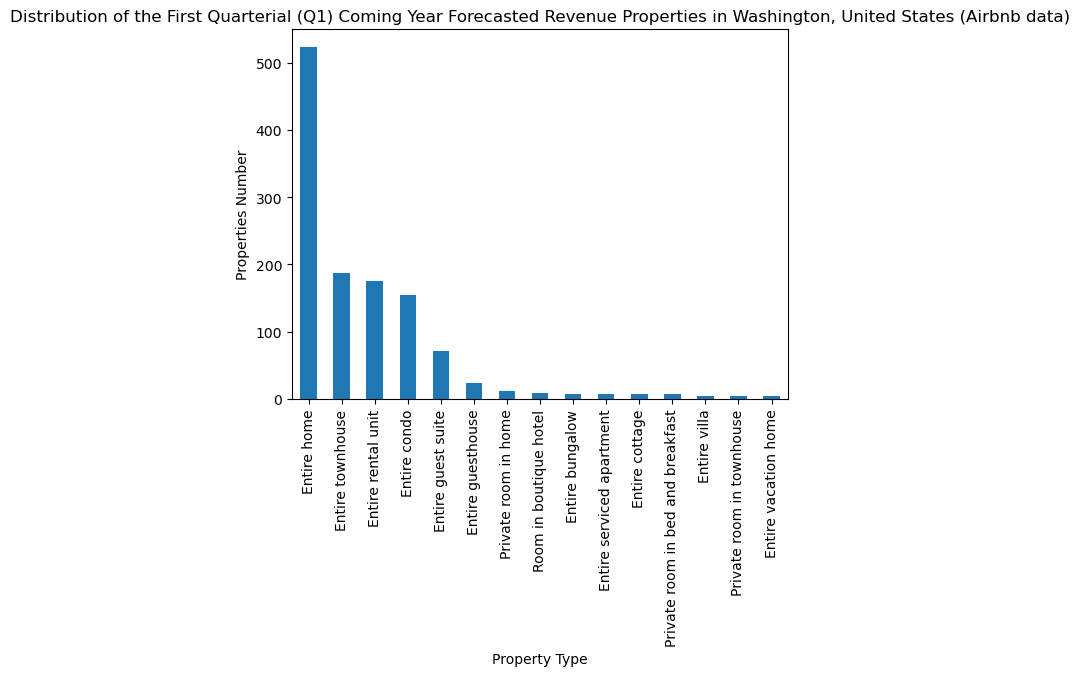

In [50]:
# Coming Year Forecasted Revenue First Quarterial (Q1) Airbnb properties in Washington, United States - Property Type Distribution
listings_clean_missing_values_Washington_Q1_count = listings_clean_missing_values_Washington_Q1['property_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the First Quarterial (Q1) Coming Year Forecasted Revenue Properties in Washington, United States (Airbnb data)' , xlabel = 'Property Type', ylabel = 'Properties Number')

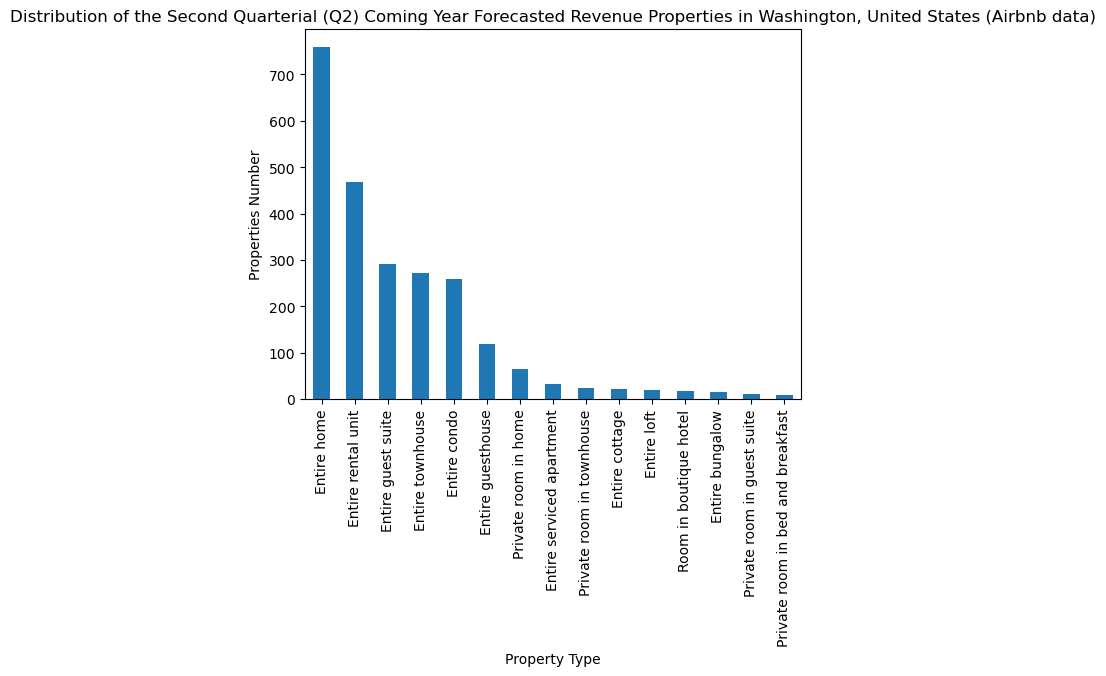

In [56]:
# Coming Year Forecasted Revenue Second Quarterial (Q2) Airbnb properties in Washington, United States - Property Type Distribution
listings_clean_missing_values_Washington_Q2_count = listings_clean_missing_values_Washington_Q2['property_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Second Quarterial (Q2) Coming Year Forecasted Revenue Properties in Washington, United States (Airbnb data)' , xlabel = 'Property Type', ylabel = 'Properties Number')

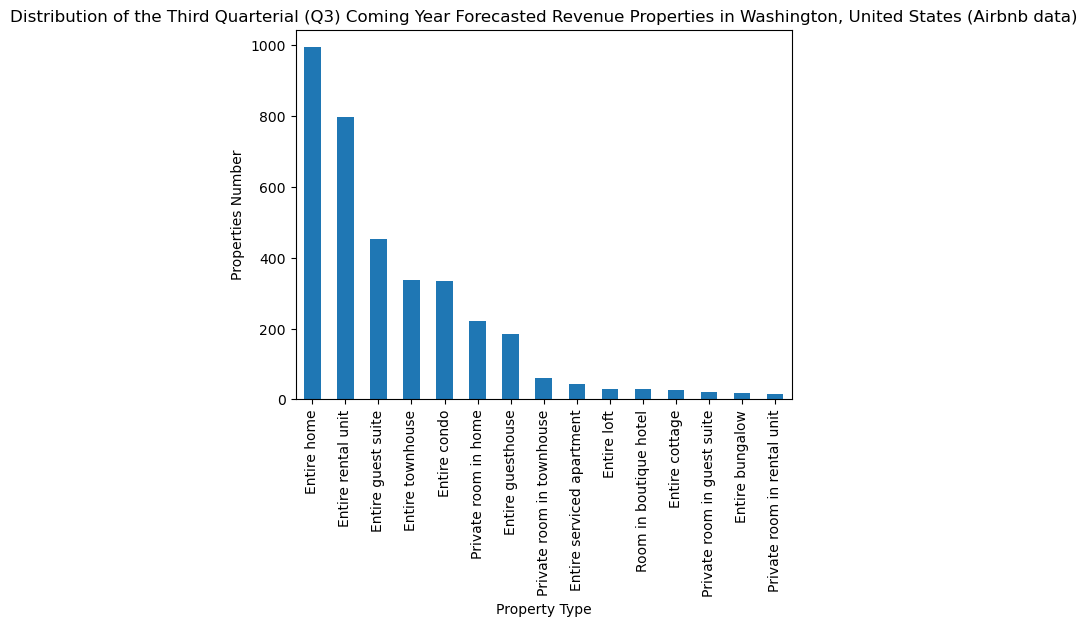

In [57]:
# Coming Year Forecasted Revenue Third Quarterial (Q3) Airbnb properties in Washington, United States - Property Type Distribution
listings_clean_missing_values_Washington_Q3_count = listings_clean_missing_values_Washington_Q3['property_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Third Quarterial (Q3) Coming Year Forecasted Revenue Properties in Washington, United States (Airbnb data)' , xlabel = 'Property Type', ylabel = 'Properties Number')

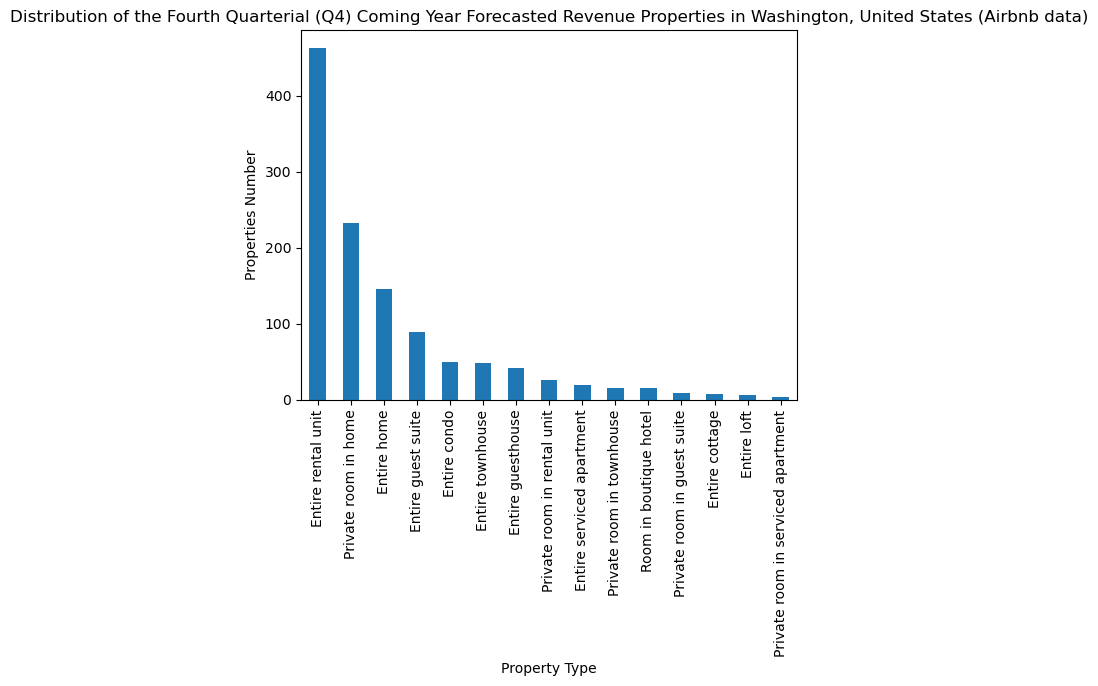

In [58]:
# Coming Year Forecasted Revenue Fourth Quarterial (Q4) Airbnb properties in Washington, United States - Property Type Distribution
listings_clean_missing_values_Washington_Q4_count = listings_clean_missing_values_Washington_Q4['property_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Fourth Quarterial (Q4) Coming Year Forecasted Revenue Properties in Washington, United States (Airbnb data)' , xlabel = 'Property Type', ylabel = 'Properties Number')

In [59]:
# Further filtering according to Room Type in the light of similiraty among Q1, Q2 and Q3 most common Prperty Type

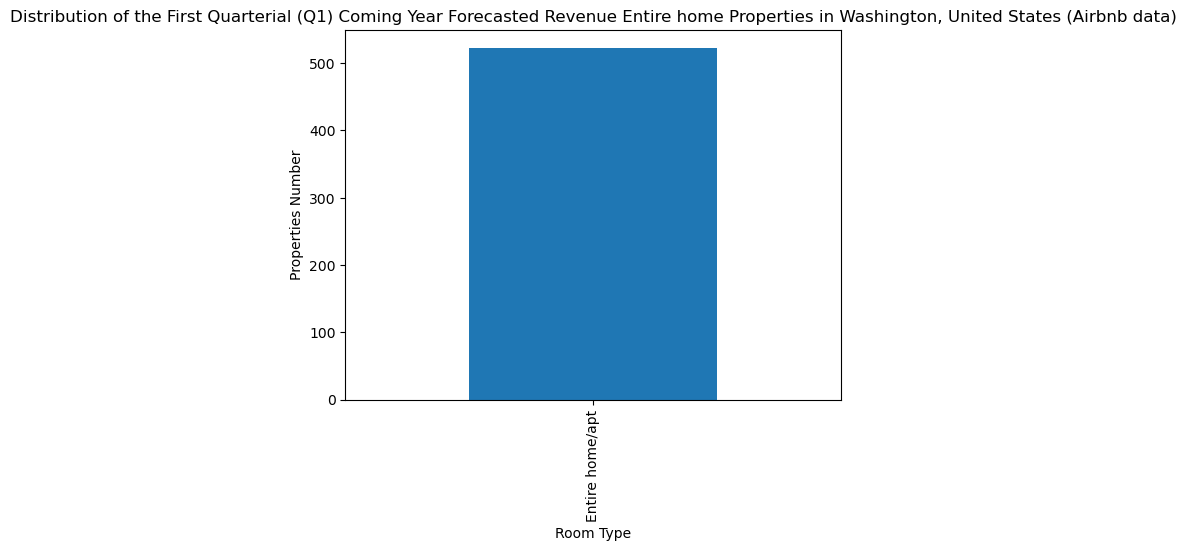

In [60]:
listings_clean_missing_values_Washington_Q1_Entire_home = listings_clean_missing_values_Washington_Q1[listings_clean_missing_values_Washington_Q1['property_type'].str.contains("Entire home")]
listings_clean_missing_values_Washington_Q1_Entire_home_count = listings_clean_missing_values_Washington_Q1_Entire_home['room_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the First Quarterial (Q1) Coming Year Forecasted Revenue Entire home Properties in Washington, United States (Airbnb data)' , xlabel = 'Room Type', ylabel = 'Properties Number')

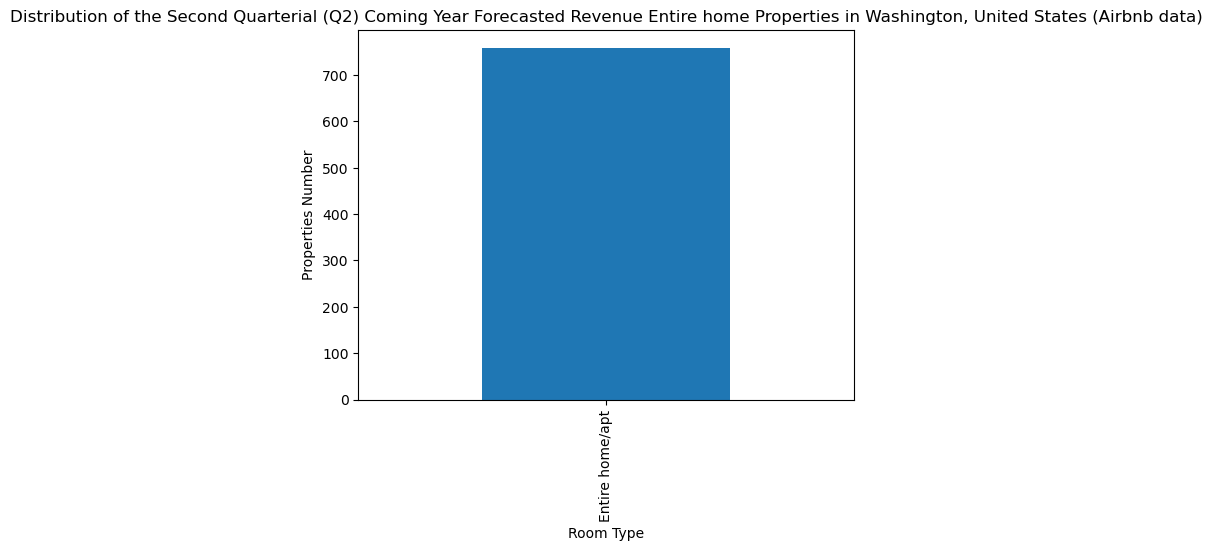

In [61]:
listings_clean_missing_values_Washington_Q2_Entire_home = listings_clean_missing_values_Washington_Q2[listings_clean_missing_values_Washington_Q2['property_type'].str.contains("Entire home")]
listings_clean_missing_values_Washington_Q2_Entire_home_count = listings_clean_missing_values_Washington_Q2_Entire_home['room_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Second Quarterial (Q2) Coming Year Forecasted Revenue Entire home Properties in Washington, United States (Airbnb data)' , xlabel = 'Room Type', ylabel = 'Properties Number')

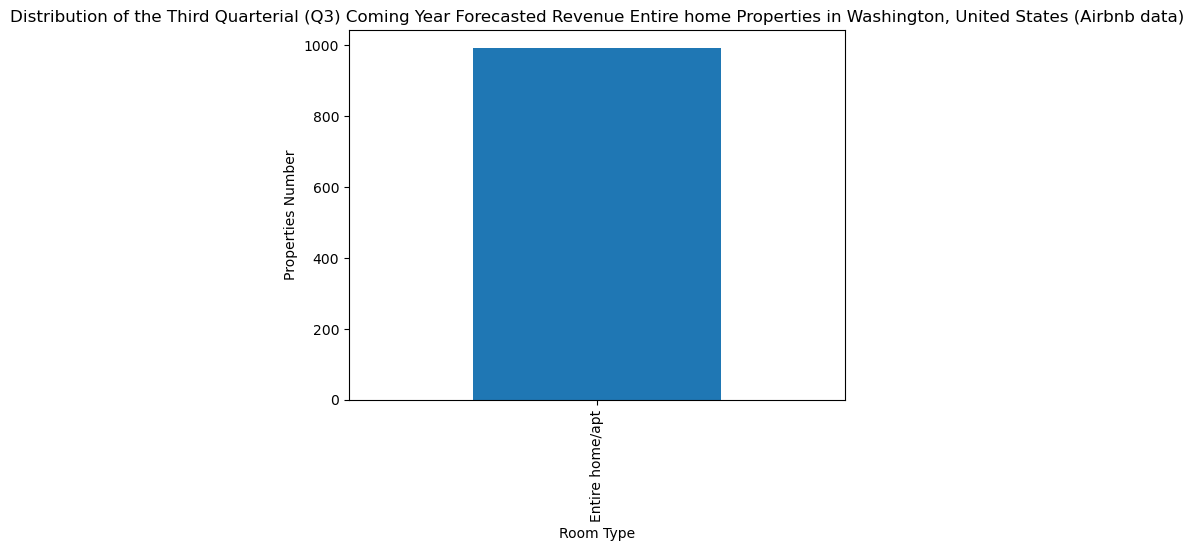

In [62]:
listings_clean_missing_values_Washington_Q3_Entire_home = listings_clean_missing_values_Washington_Q3[listings_clean_missing_values_Washington_Q3['property_type'].str.contains("Entire home")]
listings_clean_missing_values_Washington_Q3_Entire_home_count = listings_clean_missing_values_Washington_Q3_Entire_home['room_type'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Third Quarterial (Q3) Coming Year Forecasted Revenue Entire home Properties in Washington, United States (Airbnb data)' , xlabel = 'Room Type', ylabel = 'Properties Number')

In [63]:
# Further filtering according to Neighbourhood in the light of similiraty among Q1, Q2 and Q3 most common Prperty Type and Room Type

In [75]:
print(listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home.columns)

Index(['id', 'name', 'host_id', 'host_name', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'amenities', 'price', 'availability_365',
       'forecasted_revenue'],
      dtype='object')


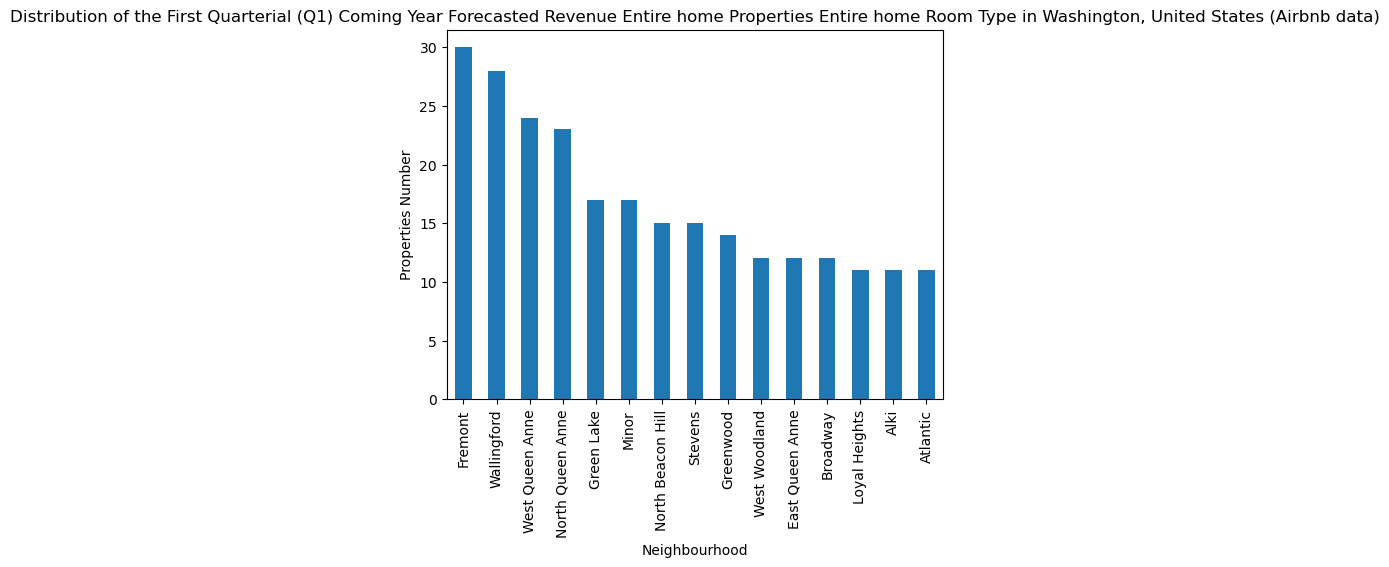

In [76]:
listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home = listings_clean_missing_values_Washington_Q1_Entire_home[listings_clean_missing_values_Washington_Q1_Entire_home['room_type'].str.contains("Entire home/apt")]
listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home_count = listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home['neighbourhood_cleansed'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the First Quarterial (Q1) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Washington, United States (Airbnb data)' , xlabel = 'Neighbourhood', ylabel = 'Properties Number')

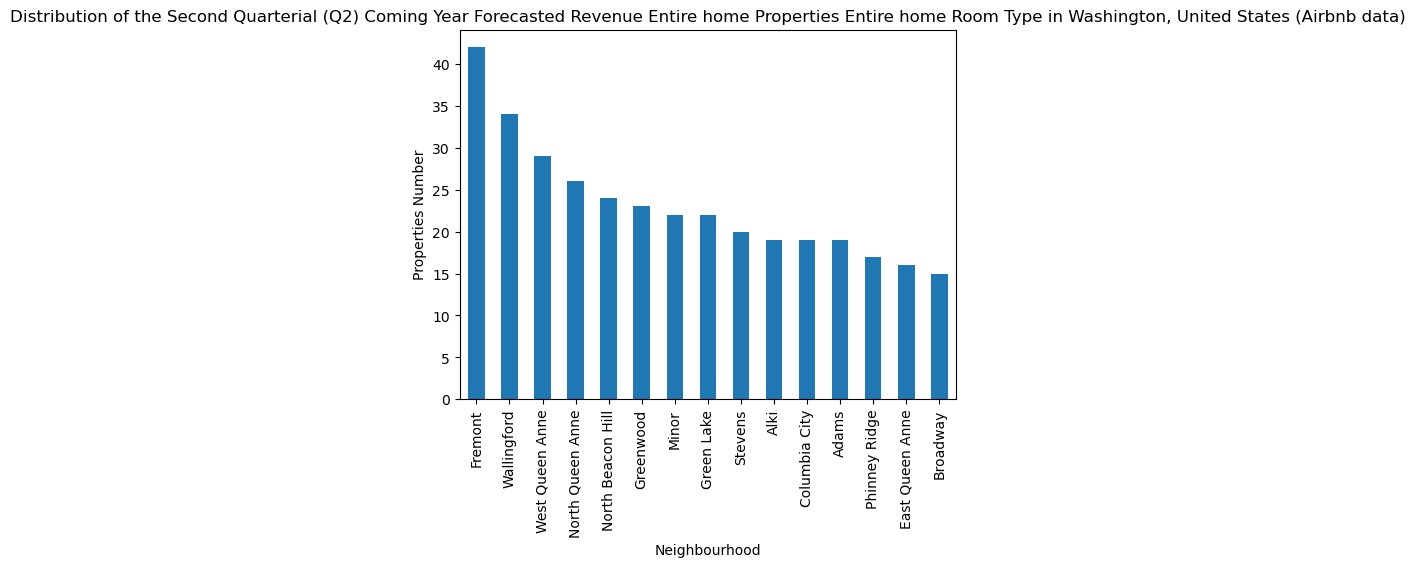

In [77]:
listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home = listings_clean_missing_values_Washington_Q2_Entire_home[listings_clean_missing_values_Washington_Q2_Entire_home['room_type'].str.contains("Entire home/apt")]
listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home_count = listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home['neighbourhood_cleansed'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Second Quarterial (Q2) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Washington, United States (Airbnb data)' , xlabel = 'Neighbourhood', ylabel = 'Properties Number')

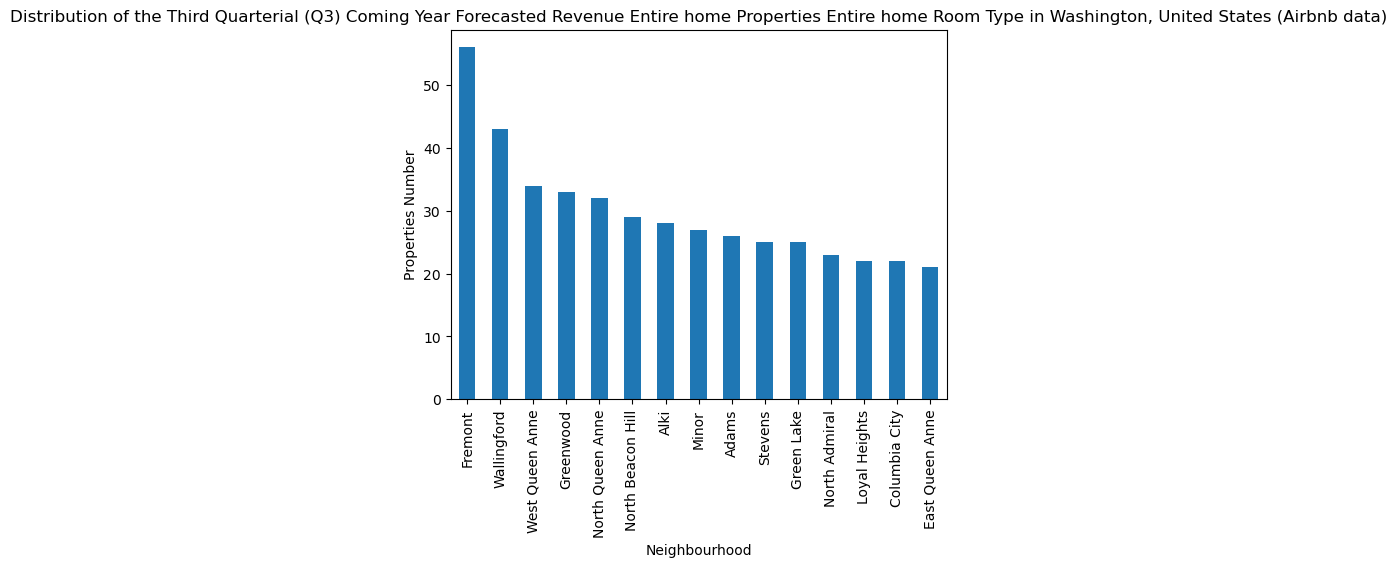

In [78]:
listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home = listings_clean_missing_values_Washington_Q3_Entire_home[listings_clean_missing_values_Washington_Q3_Entire_home['room_type'].str.contains("Entire home/apt")]
listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home_count = listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home['neighbourhood_cleansed'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Third Quarterial (Q3) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Washington, United States (Airbnb data)' , xlabel = 'Neighbourhood', ylabel = 'Properties Number')

In [22]:
# Further filtering according to Accommodates in the light of similiraty among Q1, Q2 and Q3 most common Prperty Type, Room Type and Neighbourhood

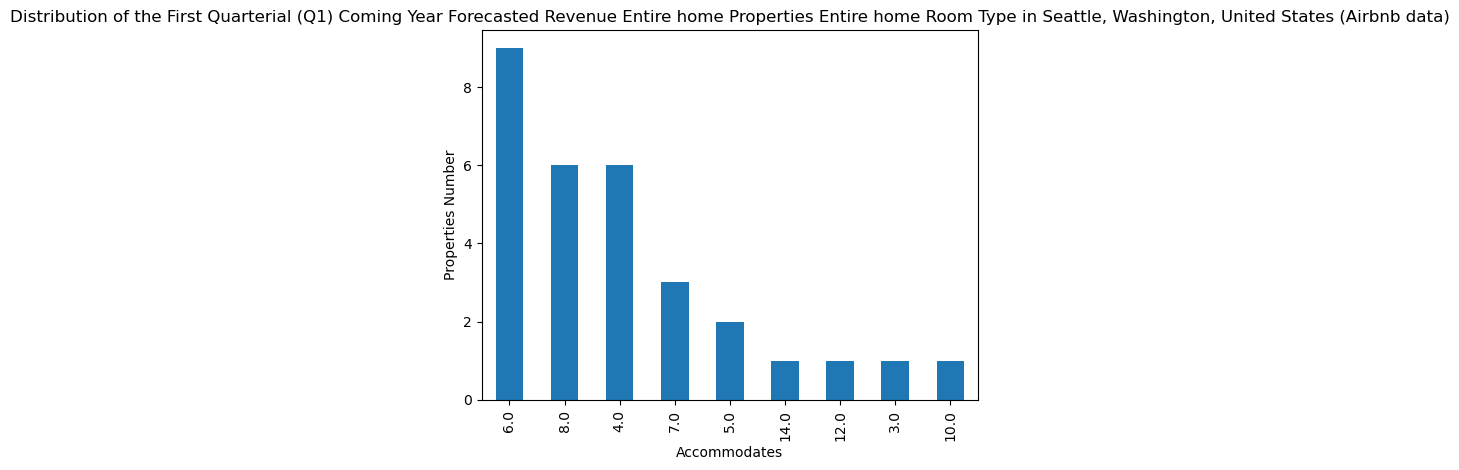

In [82]:
listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home_Neighbourhood = listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home[listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home['neighbourhood_cleansed'].str.contains("Fremont")]
listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home_Neighbourhood_count = listings_clean_missing_values_Washington_Q1_Entire_home_Entire_home_Neighbourhood['accommodates'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the First Quarterial (Q1) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Seattle, Washington, United States (Airbnb data)' , xlabel = 'Accommodates', ylabel = 'Properties Number')

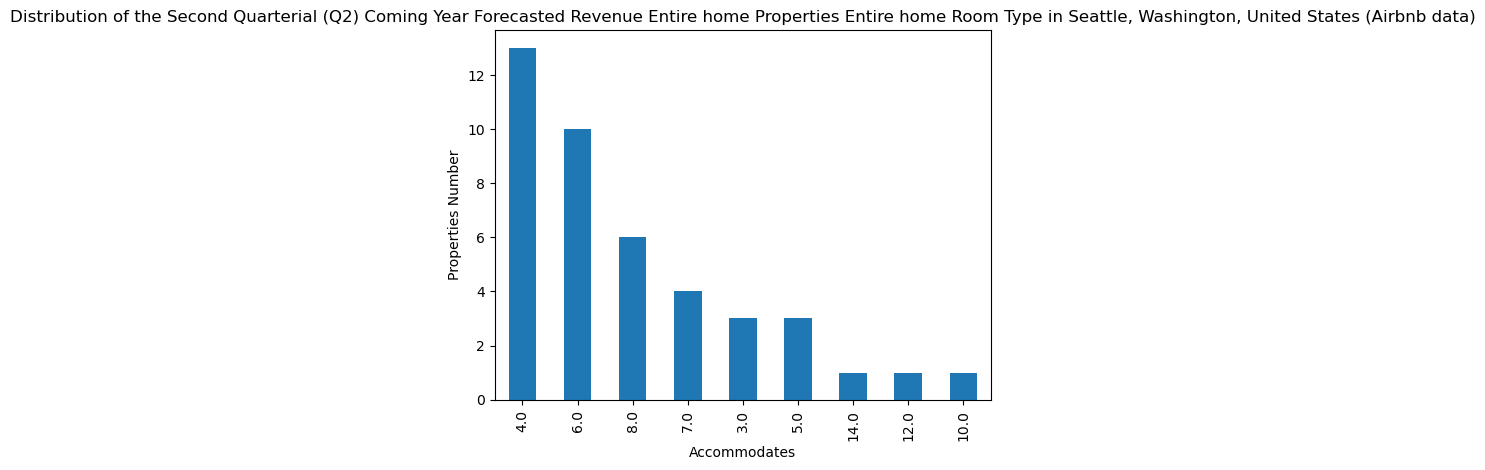

In [83]:
listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home_Neighbourhood = listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home[listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home['neighbourhood_cleansed'].str.contains("Fremont")]
listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home_Neighbourhood_count = listings_clean_missing_values_Washington_Q2_Entire_home_Entire_home_Neighbourhood['accommodates'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Second Quarterial (Q2) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Seattle, Washington, United States (Airbnb data)' , xlabel = 'Accommodates', ylabel = 'Properties Number')

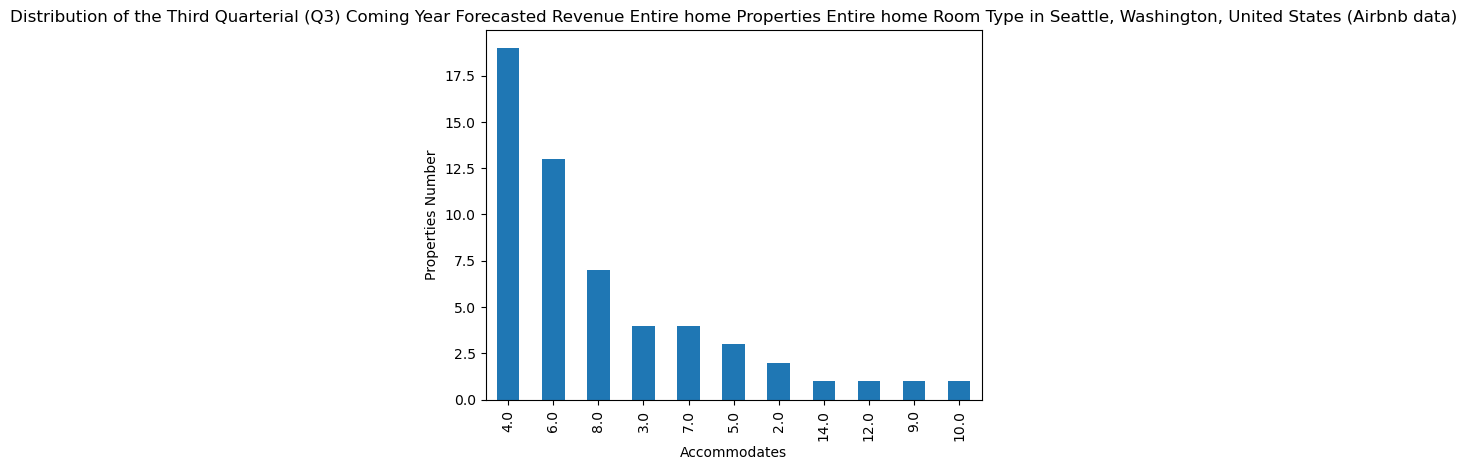

In [84]:
listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home_Neighbourhood = listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home[listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home['neighbourhood_cleansed'].str.contains("Fremont")]
listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home_Neighbourhood_count = listings_clean_missing_values_Washington_Q3_Entire_home_Entire_home_Neighbourhood['accommodates'].value_counts().head(15).plot(kind = 'bar', title = 'Distribution of the Third Quarterial (Q3) Coming Year Forecasted Revenue Entire home Properties Entire home Room Type in Seattle, Washington, United States (Airbnb data)' , xlabel = 'Accommodates', ylabel = 'Properties Number')

In [26]:
# Following that a Quarterial slicing has not established a siginificane conclusion, 
# below is an analysis on the entire above Properties population, based on the same KPI, i.e., Forecasted Revenue.

<Axes: xlabel='forecasted_revenue', ylabel='property_type'>

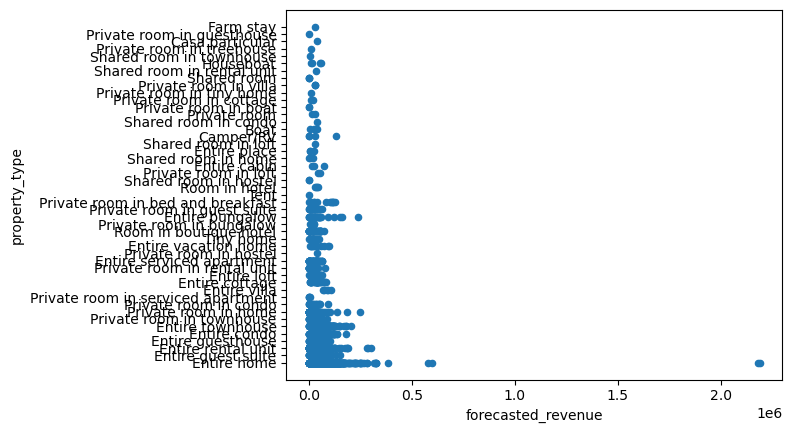

In [85]:
listings_clean_missing_values_Washington.plot.scatter(y  = "property_type", x = "forecasted_revenue")

In [89]:
# Outliers Handling
listings_clean_missing_values_Washington_outliers = listings_clean_missing_values_Washington.query('forecasted_revenue > 2000000')
listings_clean_missing_values_Washington_outliers

,id,name,host_id,host_name,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,amenities,price,availability_365,forecasted_revenue
3725,671061550390794363,Home in Seattle · ★4.25 · 2 bedrooms · 3 beds ...,241568755,Jen,t,"Seattle, Washington, United States",Fremont,Entire home,Entire home/apt,6,"[""Carbon monoxide alarm"", ""Dishwasher"", ""Stain...",10000.0,146,2190000.0
4419,657209588432970097,Home in Seattle · ★4.33 · 3 bedrooms · 3 beds ...,241568755,Jen,t,"Seattle, Washington, United States",Fremont,Entire home,Entire home/apt,7,"[""Carbon monoxide alarm"", ""Fire extinguisher"",...",10000.0,147,2180000.0


In [90]:
listings_clean_missing_values_Washington_no_outliers = listings_clean_missing_values_Washington.query('forecasted_revenue < 2000000')
listings_clean_missing_values_Washington_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 6634
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4856 non-null   int64  
 1   name                    4856 non-null   object 
 2   host_id                 4856 non-null   int64  
 3   host_name               4856 non-null   object 
 4   host_identity_verified  4856 non-null   object 
 5   neighbourhood           4856 non-null   object 
 6   neighbourhood_cleansed  4856 non-null   object 
 7   property_type           4856 non-null   object 
 8   room_type               4856 non-null   object 
 9   accommodates            4856 non-null   int64  
 10  amenities               4856 non-null   object 
 11  price                   4856 non-null   float64
 12  availability_365        4856 non-null   int64  
 13  forecasted_revenue      4856 non-null   float64
dtypes: float64(2), int64(4), object(8)
memor

<Axes: xlabel='forecasted_revenue', ylabel='property_type'>

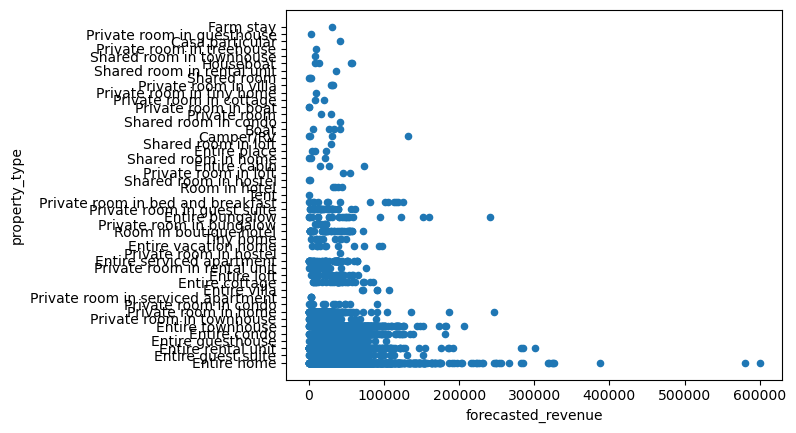

In [91]:
listings_clean_missing_values_Washington_no_outliers.plot.scatter(y  = "property_type", x = "forecasted_revenue")

<Axes: xlabel='forecasted_revenue', ylabel='room_type'>

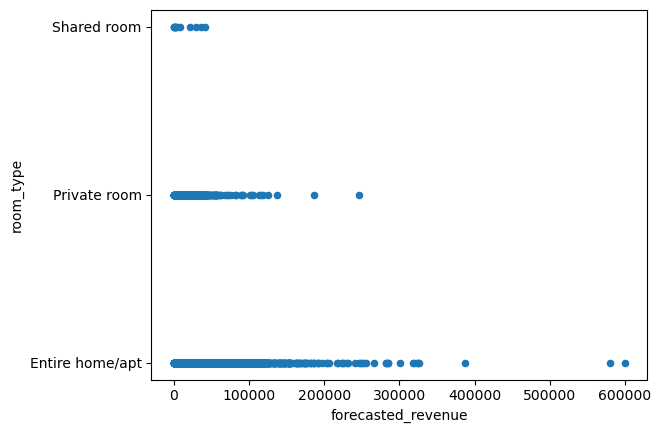

In [92]:
listings_clean_missing_values_Washington_no_outliers.plot.scatter(y  = "room_type", x = "forecasted_revenue")

<Axes: xlabel='forecasted_revenue', ylabel='neighbourhood_cleansed'>

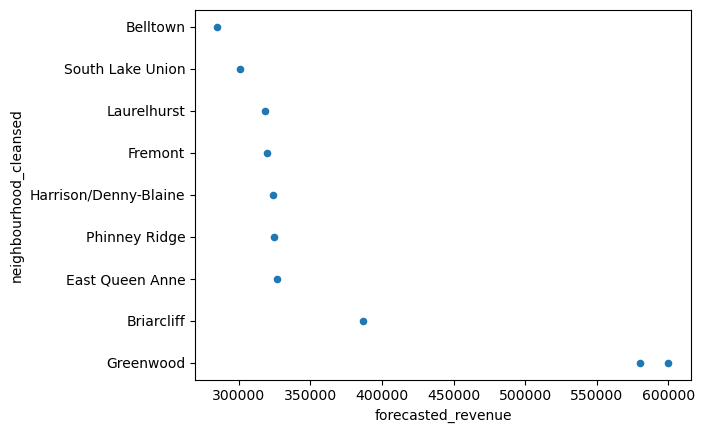

In [96]:
top_10 = listings_clean_missing_values_Washington_no_outliers.nlargest(10, 'forecasted_revenue')
top_10.plot.scatter(y  = "neighbourhood_cleansed", x = "forecasted_revenue")

<Axes: xlabel='forecasted_revenue', ylabel='accommodates'>

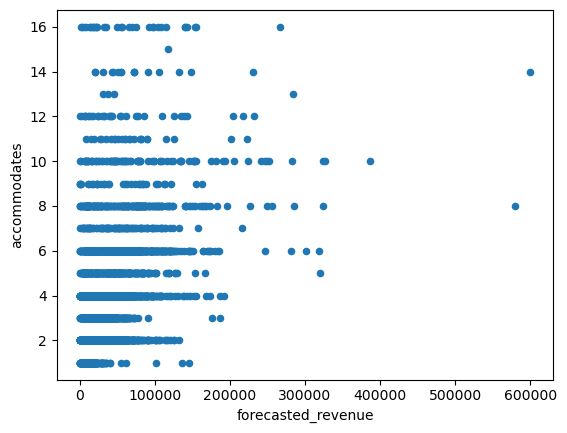

In [33]:
listings_clean_missing_values_Washington_no_outliers.plot.scatter(y  = "accommodates", x = "forecasted_revenue")

In [34]:
# Conclusion: 
# The properties with the highest Forecasted Revenue in Washington, United States in the coming year, according to Airbnb
# data are Entire Home type, with Entire Home / Apartment room type, located in Seattle, and which are suitable to 
# accommodate 6 to 10 people.